# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [386]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('marketing campaign.csv')
df.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


Histogram for Year_Birth


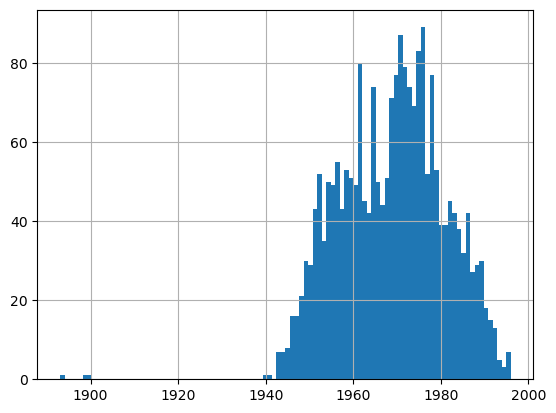

Histogram for Recency


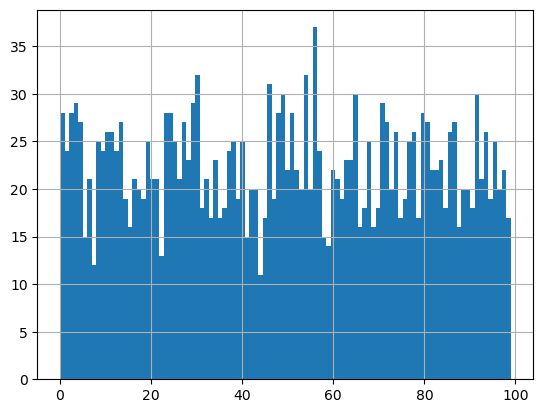

Histogram for MntFruits


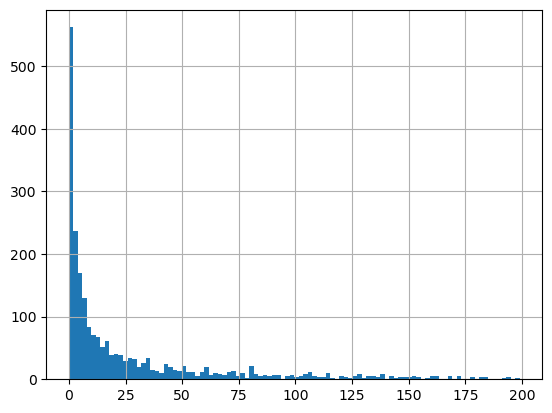

Histogram for MntMeatProducts


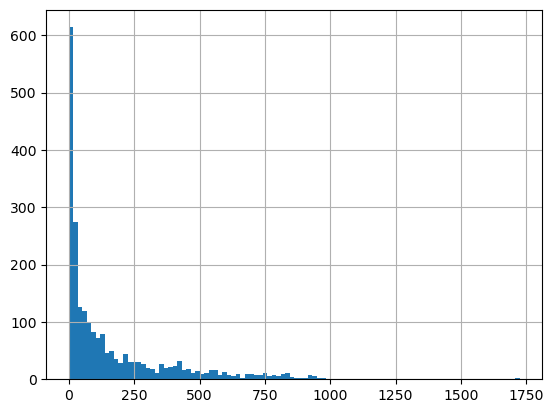

Histogram for MntFishProducts


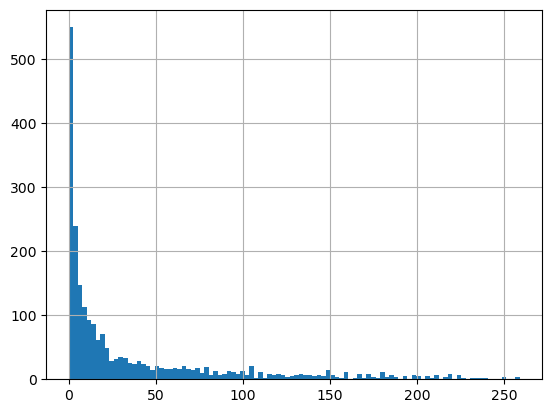

Histogram for MntSweetProducts


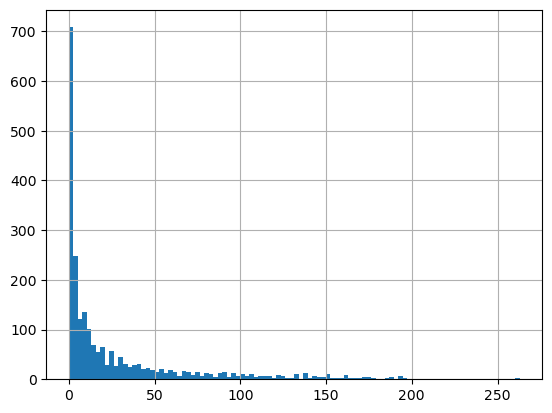

Histogram for NumWebPurchases


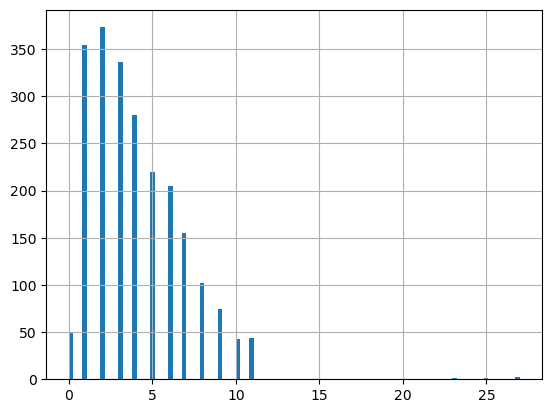

Histogram for NumStorePurchases


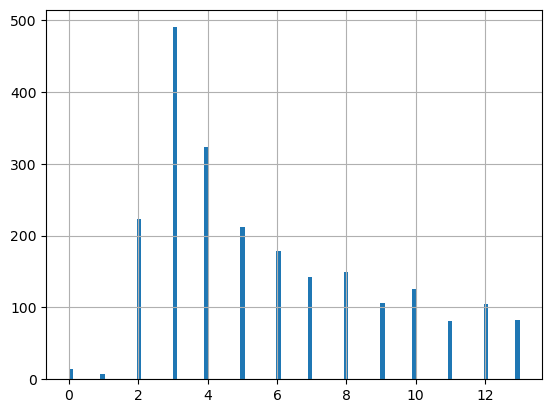

Histogram for Response


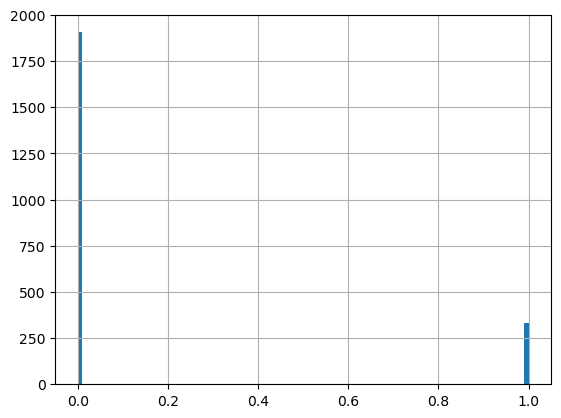

In [203]:
import matplotlib.pyplot as plt
cols = ['Year_Birth',
        'Recency',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'NumWebPurchases',
        'NumStorePurchases',
        'Response']

for col in cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

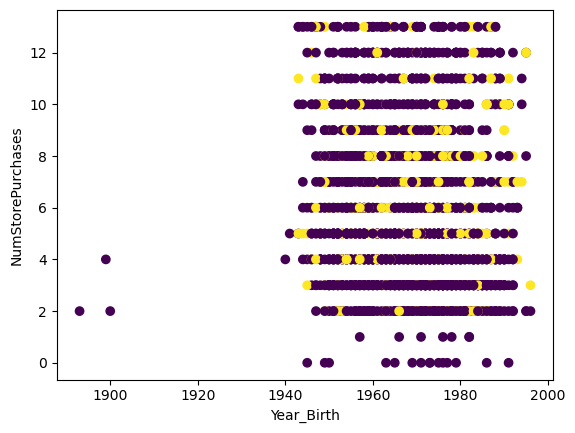

In [315]:
plt.scatter(df['Year_Birth'], df['NumStorePurchases'], c=df['Response'])
plt.xlabel('Year_Birth')
plt.ylabel('NumStorePurchases')
plt.show()

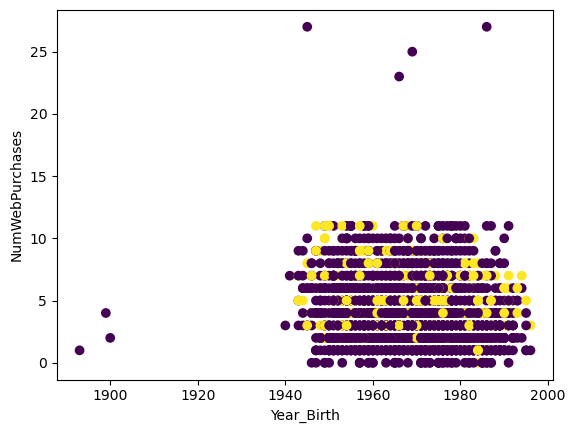

In [316]:
plt.scatter(df['Year_Birth'], df['NumWebPurchases'], c=df['Response'])
plt.xlabel('Year_Birth')
plt.ylabel('NumWebPurchases')
plt.show()

# Вывод
### Year_Birth — год рождения клиента распределен нормально, есть несколько явных выбросов(скорее всего опечатки)
### Recency — количество дней с момента последней покупки принимает значения от 0 до 100 с не очень большим разбросом, визуально можно разделить на 3-5 групп.
### MntFruits — сумма, потраченная на фрукты, MntMeatProducts — сумма, потраченная на мясо, MntFishProducts — сумма, потраченная на рыбу, MntSweetProducts — сумма, потраченная на сладости имеют схожие распределения, содержат незначительное количество данных, похожих на выбросы, наибольшее количсетво значений = 0
### NumWebPurchases/NumStorePurchases — количество покупок, совершённых через сайт/магазин имеют схожие распределения, есть признаки небольших аномалий
### Response - участвовал ли клиент в последней рекламной кампании, количсетво участвовавших в предыдущей компании клиентов примерно в 8 раз меньше, чем тех, кто не участвовал.

# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

# Из информации, полученной по графикам, я бы выделял либо 2 кластера(онлайн и оффлайн покупки). Либо 3 кластера - по тратам/среднему чеку, времени с последней покупки. Либо 4 кластера(клиенты не покупающие мясо, не покупающие рыбу, не покупающие фрукты, не покупающие сладости)


# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

In [ ]:
#Находим количество уникальных занчений в каждом столбце
for i in df.columns:
    print(
f"""Характеристика: {i} 
Количество уникальных значений: {df[i].nunique()} 
Список значений:
{df[i].value_counts()}
""")

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Year_Birth'),
  Text(2, 0, 'Recency'),
  Text(3, 0, 'MntFruits'),
  Text(4, 0, 'MntMeatProducts'),
  Text(5, 0, 'MntFishProducts'),
  Text(6, 0, 'MntSweetProducts'),
  Text(7, 0, 'NumWebPurchases'),
  Text(8, 0, 'NumStorePurchases'),
  Text(9, 0, 'Response')])

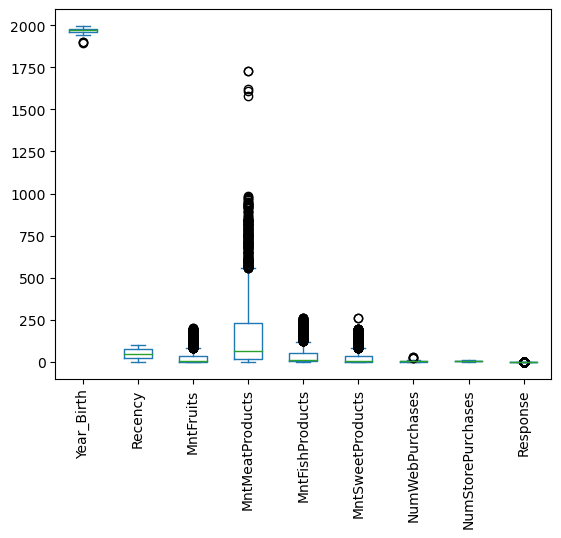

In [6]:
df[cols].plot(kind='box')
plt.xticks(rotation = 90)

In [318]:
def calculate_outliers(data): #функция для нахождения границ
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

for col in cols:
    boundaries = calculate_outliers(df[col])
    #Cчитаем и выводим количество выбросов в доходе.
    is_outlier = (df[col] < boundaries[0]) | (df[col] > boundaries[1])
    print('Kоличество выбросов в', col, ' = ', is_outlier.sum(), 
        'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
    


Kоличество выбросов в Year_Birth  =  3 граница нижняя - 1932.0 граница верхняя - 2004.0
Kоличество выбросов в Recency  =  0 граница нижняя - -51.0 граница верхняя - 149.0
Kоличество выбросов в MntFruits  =  227 граница нижняя - -47.0 граница верхняя - 81.0
Kоличество выбросов в MntMeatProducts  =  175 граница нижняя - -308.0 граница верхняя - 556.0
Kоличество выбросов в MntFishProducts  =  223 граница нижняя - -67.5 граница верхняя - 120.5
Kоличество выбросов в MntSweetProducts  =  248 граница нижняя - -47.0 граница верхняя - 81.0
Kоличество выбросов в NumWebPurchases  =  4 граница нижняя - -4.0 граница верхняя - 12.0
Kоличество выбросов в NumStorePurchases  =  0 граница нижняя - -4.5 граница верхняя - 15.5
Kоличество выбросов в Response  =  334 граница нижняя - 0.0 граница верхняя - 0.0


In [319]:
boundaries = calculate_outliers(df['Year_Birth'])
#Cчитаем и выводим количество выбросов в Year_Birth.
is_outlier = (df['Year_Birth'] < boundaries[0]) | (df['Year_Birth'] > boundaries[1])
print('Kоличество выбросов в Year_Birth   = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='Year_Birth')
df_cp
#Здесь явно выбросы, если в 1893 и 1899 возможна опечатка и истинные значения 1993 и 1999, то 1900 возможно просталено нулю. 
#Заменим медианой

Kоличество выбросов в Year_Birth   =  3 граница нижняя - 1932.0 граница верхняя - 2004.0


,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
239,11004,1893,17-05-2014,23,0,5,7,0,1,2,0
339,1150,1899,26-09-2013,36,144,562,104,64,4,4,0
192,7829,1900,26-09-2013,99,6,8,7,4,2,2,0


In [320]:
boundaries = calculate_outliers(df['MntSweetProducts'])
#Cчитаем и выводим количество выбросов в MntSweetProducts.
is_outlier = (df['MntSweetProducts'] < boundaries[0]) | (df['MntSweetProducts'] > boundaries[1])
print('Kоличество выбросов в MntSweetProducts   = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='MntSweetProducts')
df_cp

# так как эти клиенты зарегистрированы давно, то вполне возможно, что они потратили намного больше денег на сладости, чем другие
# это касается и остальных видов покупок

Kоличество выбросов в MntSweetProducts   =  248 граница нижняя - -47.0 граница верхняя - 81.0


,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
68,4477,1958,27-09-2013,4,49,159,7,82,5,10,0
116,1592,1970,24-01-2014,25,99,812,151,82,4,5,0
658,3867,1947,31-08-2013,36,112,420,0,82,9,13,0
1630,3859,1947,31-08-2013,36,112,420,0,82,9,13,0
1082,8707,1956,22-08-2012,12,42,548,64,83,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...
1671,1964,1951,05-09-2013,66,107,768,33,196,5,6,0
1513,9264,1986,27-04-2014,1,42,706,73,197,4,9,0
634,8923,1973,18-04-2013,12,22,732,42,198,6,7,1
1898,4619,1945,28-05-2014,9,2,3,1,262,27,0,0


In [322]:
boundaries = calculate_outliers(df['NumWebPurchases'])
#Cчитаем и выводим количество выбросов в NumWebPurchases.
is_outlier = (df['NumWebPurchases'] < boundaries[0]) | (df['NumWebPurchases'] > boundaries[1])
print('Kоличество выбросов в NumWebPurchases   = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='NumWebPurchases')
df_cp.head()
#Эти клиенты зарегистрированы давно(около 10 лет),плюс в магазин они не ходят, поэтому 23-27 покупок это скорее аномалии, 
# но смущает, у 1 и 2 очень маленькие суммы, а у 3 и 4 покупают только сладости, поэтому удаляю эти строки.

Kоличество выбросов в NumWebPurchases   =  4 граница нижняя - -4.0 граница верхняя - 12.0


,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
1806,6237,1966,07-12-2013,92,4,33,5,2,23,1,0
1975,10311,1969,05-10-2013,0,4,12,2,4,25,0,0
27,5255,1986,20-02-2013,19,1,3,3,263,27,0,0
1898,4619,1945,28-05-2014,9,2,3,1,262,27,0,0


In [387]:
df = df[~((df.NumWebPurchases < boundaries[0]) | (df.NumWebPurchases > boundaries[1]))]
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,13-06-2013,46,43,182,42,118,9,4,0
2236,4001,1946,10-06-2014,56,0,30,0,0,8,5,0
2237,7270,1981,25-01-2014,91,48,217,32,12,2,13,0
2238,8235,1956,24-01-2014,8,30,214,80,30,6,10,0


In [12]:
#Kоличество выбросов в MntFruits  =  227 граница нижняя - -47.0 граница верхняя - 81.0
#Kоличество выбросов в MntMeatProducts  =  175 граница нижняя - -308.0 граница верхняя - 556.0
#Kоличество выбросов в MntFishProducts  =  223 граница нижняя - -67.5 граница верхняя - 120.5
#Kоличество выбросов в MntSweetProducts  =  248 граница нижняя - -47.0 граница верхняя - 81.0
#эти выбросы дополнительно проанализируем методом IsolationForest, так как не совсем понятно выбросы это или нет.

In [38]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
isf = IsolationForest(n_estimators=100, contamination=0.5, random_state=42)
y_pred = isf.fit_predict(df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']])


In [39]:
df['outlier'] = y_pred
df.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,outlier
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1,-1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0,1
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0,-1
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0,1
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0,-1


In [40]:
#Данный метод определения выбросов так же не сработал
df_2 = df[df['outlier'] == 1]
df = df.drop(columns=['outlier'])
df_2

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,outlier
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0,1
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0,1
7,6177,1985,08-05-2013,32,10,56,3,1,4,4,0,1
8,4855,1974,06-06-2013,19,0,24,3,3,3,2,1,1
9,5899,1950,13-03-2014,68,0,6,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,17-08-2012,50,1,6,3,4,0,3,0,1
2233,9432,1977,02-06-2013,23,14,18,8,1,3,3,0,1
2234,8372,1974,01-07-2013,81,3,7,6,2,1,2,0,1
2236,4001,1946,10-06-2014,56,0,30,0,0,8,5,0,1


In [388]:
# год рождения заменим на возраст(age)
# дату регистрации на количество лет с момента регистрации(Registration_dt)
# сумма всех покупок(total_sum)
# средний чек по клиенту
df['age'] = df.Year_Birth.apply(lambda x: 2023 - x)
df['Registration_dt'] = df.Dt_Customer.apply(lambda x: 2023 - int(x.split('-')[2]))
df['total_sum'] = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)
df['avg_purchase'] = (df['total_sum'] / (df['NumWebPurchases'] + df['NumStorePurchases'])).round(0)
import numpy as np
df['avg_purchase'].replace([np.inf, -np.inf], 0, inplace=True)
df['avg_purchase'] = df['avg_purchase'].astype(int)
#Удалим ненужные столбцы
df = df.drop(columns=['ID', 'Year_Birth','Dt_Customer'])
#меняем выбросы на медиану в Age
df.age[df['age'] >= 100.0] = df['age'].median()

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Recency            2236 non-null   int64
 1   MntFruits          2236 non-null   int64
 2   MntMeatProducts    2236 non-null   int64
 3   MntFishProducts    2236 non-null   int64
 4   MntSweetProducts   2236 non-null   int64
 5   NumWebPurchases    2236 non-null   int64
 6   NumStorePurchases  2236 non-null   int64
 7   Response           2236 non-null   int64
 8   age                2236 non-null   int64
 9   Registration_dt    2236 non-null   int64
 10  total_sum          2236 non-null   int64
 11  avg_purchase       2236 non-null   int32
dtypes: int32(1), int64(11)
memory usage: 218.4 KB


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

In [372]:
#df = df.drop(columns=['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' ])

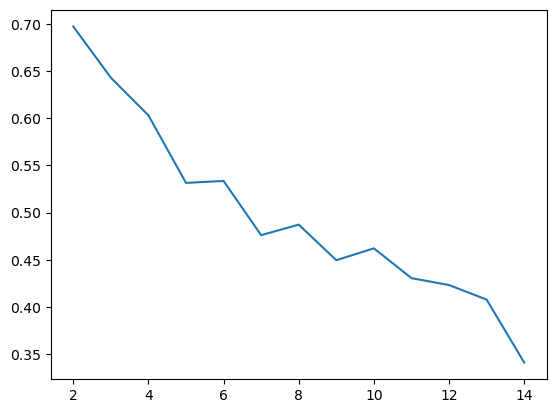

In [389]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clusters = list(range(2, 15))
metr = []
metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(df)
  score = silhouette_score(df, km.labels_)
  metrics.append(score)
  metr.append(km.inertia_)


plt.plot(n_clusters, metrics)


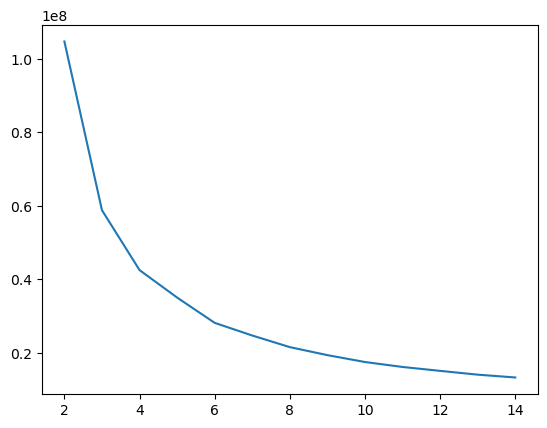

In [390]:
#метод локтя
plt.plot(n_clusters, metr)

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

In [391]:
#По графику метрики оптисальное значение 2, по методу локтя 3-4, выбрал 3, 
# так как при этом значении метрика выше, чем 4, да и по итогам различных вариантов, 3 класса позволяют более менее вменяемо разделить выборку
km = KMeans(n_clusters=3).fit(df)
labels = km.labels_

In [394]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)
data

,0,1
0,46.570465,14.485028
1,-50.833450,-0.914492
2,22.551630,-11.408796
3,-32.906189,-4.387253
4,16.729071,-19.861446
...,...,...
2231,31.040724,-12.593756
2232,-23.214323,9.029024
2233,30.585773,-24.905947
2234,30.910551,-18.291521


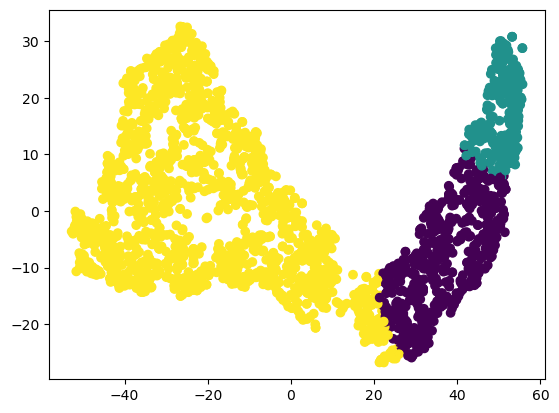

In [395]:
plt.scatter(data[0], data[1], c=labels)
plt.show()

# Задание 6

Постройте профили кластеров и опишите их.

In [396]:
df.columns.tolist()

['Recency',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases',
 'NumStorePurchases',
 'Response',
 'age',
 'Registration_dt',
 'total_sum',
 'avg_purchase']

In [397]:
df['clusters'] = pd.DataFrame(data=km.labels_)
features = ['Recency',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumWebPurchases',
 'NumStorePurchases',
 'Response',
 'age',
 'Registration_dt',
 'total_sum',
 'avg_purchase'
 ]

In [398]:
df_g = df.groupby('clusters').agg({x: ['mean', 'std'] for x in features}).T
df_g

clusters                       0.0         1.0         2.0
Recency           mean   51.735060   50.644351   48.031522
                  std    28.404540   29.256959   29.011587
MntFruits         mean   28.332669   24.962343   25.912810
                  std    43.206357   36.526188   39.138977
MntMeatProducts   mean  157.768924  173.552301  169.494299
                  std   214.055150  246.276243  226.570141
MntFishProducts   mean   37.191235   37.117155   37.820926
                  std    54.328153   55.375370   54.734203
MntSweetProducts  mean   25.976096   24.899582   27.535882
                  std    39.404036   36.827305   41.765090
NumWebPurchases   mean    4.219124    3.899582    4.010060
                  std     2.719008    2.594103    2.601864
NumStorePurchases mean    5.856574    5.736402    5.785379
                  std     3.229008    3.242570    3.249917
Response          mean    0.135458    0.171548    0.150235
                  std     0.342554    0.377778    0.357421
age               mean   54.790837   54.217573   53.811536
                  std    11.513338   11.555981   11.749569
Registration_dt   mean    9.962151    9.966527    9.977867
                  std     0.686745    0.685174    0.683590
total_sum         mean  249.268924  260.531381  260.763917
                  std   301.282683  332.477797  314.056425
avg_purchase      mean   23.498008   21.192469   22.830315
                  std    76.751296   25.152572   48.409773

In [399]:
import numpy as np

functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

clusters                       0.0         1.0         2.0      Global
Recency           mean   51.735060   50.644351   48.031522   49.143560
                  std    28.404540   29.256959   29.011587   28.936070
MntFruits         mean   28.332669   24.962343   25.912810   26.344365
                  std    43.206357   36.526188   39.138977   39.796478
MntMeatProducts   mean  157.768924  173.552301  169.494299  167.225850
                  std   214.055150  246.276243  226.570141  225.822298
MntFishProducts   mean   37.191235   37.117155   37.820926   37.587657
                  std    54.328153   55.375370   54.734203   54.657976
MntSweetProducts  mean   25.976096   24.899582   27.535882   26.873882
                  std    39.404036   36.827305   41.765090   40.705921
NumWebPurchases   mean    4.219124    3.899582    4.010060    4.046512
                  std     2.719008    2.594103    2.601864    2.628289
NumStorePurchases mean    5.856574    5.736402    5.785379    5.800089
                  std     3.229008    3.242570    3.249917    3.245347
Response          mean    0.135458    0.171548    0.150235    0.149374
                  std     0.342554    0.377778    0.357421    0.356536
age               mean   54.790837   54.217573   53.811536   54.092576
                  std    11.513338   11.555981   11.749569   11.687923
Registration_dt   mean    9.962151    9.966527    9.977867    9.972272
                  std     0.686745    0.685174    0.683590    0.684857
total_sum         mean  249.268924  260.531381  260.763917  258.031753
                  std   301.282683  332.477797  314.056425  312.954875
avg_purchase      mean   23.498008   21.192469   22.830315   22.788909
                  std    76.751296   25.152572   48.409773   54.321647

In [400]:
cluster_labels = [0, 1, 2]

for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

clusters                      0.0        1.0        2.0      Global
Recency           mean   5.273325   3.053893  -2.262835   49.143560
                  std   -1.836912   1.108956   0.260977   28.936070
MntFruits         mean   7.547361  -5.245987  -1.638129   26.344365
                  std    8.568294  -8.217535  -1.652159   39.796478
MntMeatProducts   mean  -5.655182   3.783178   1.356518  167.225850
                  std   -5.210800   9.057540   0.331164  225.822298
MntFishProducts   mean  -1.054659  -1.251745   0.620600   37.587657
                  std   -0.603431   1.312515   0.139463   54.657976
MntSweetProducts  mean  -3.340739  -7.346539   2.463358   26.873882
                  std   -3.198269  -9.528383   2.602001   40.705921
NumWebPurchases   mean   4.265696  -3.631030  -0.900807    4.046512
                  std    3.451655  -1.300698  -1.005397    2.628289
NumStorePurchases mean   0.973852  -1.098048  -0.253625    5.800089
                  std   -0.503456  -0.085582   0.140816    3.245347
Response          mean  -9.316029  14.844787   0.576312    0.149374
                  std   -3.921819   5.957882   0.248189    0.356536
age               mean   1.290862   0.231080  -0.519554   54.092576
                  std   -1.493714  -1.128870   0.527439   11.687923
Registration_dt   mean  -0.101487  -0.057607   0.056108    9.972272
                  std    0.275621   0.046216  -0.185066    0.684857
total_sum         mean  -3.396027   0.968729   1.058848  258.031753
                  std   -3.729673   6.238255   0.351984  312.954875
avg_purchase      mean   3.111598  -7.005338   0.181696   22.788909
                  std   41.290444 -53.696964 -10.883091   54.321647

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

<Axes: xlabel='clusters', ylabel='None-None'>

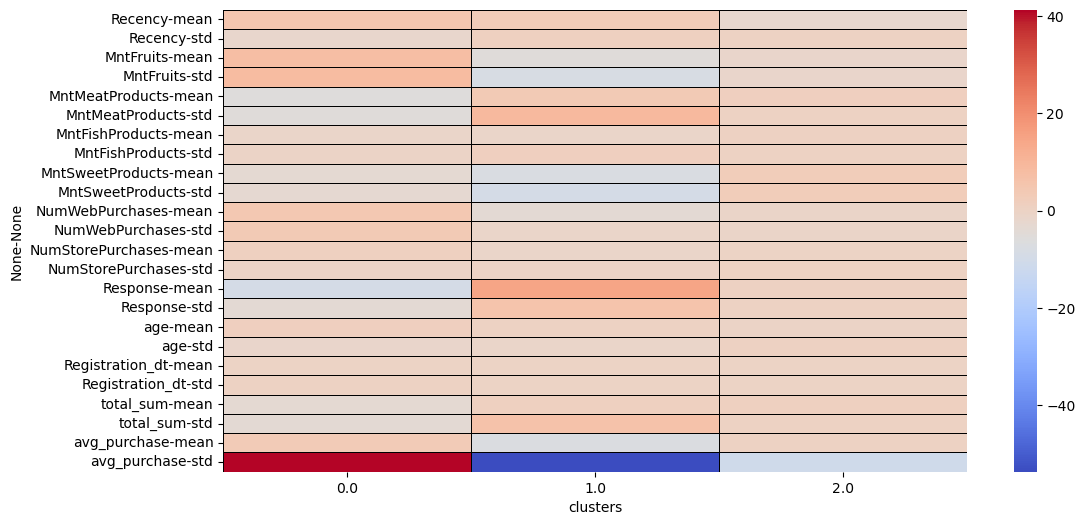

In [401]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm', linewidths=0.5, linecolor='black')


# Вывод

### Испробовав около 10 вариантов(удаления выбросов, использования/удаления фич), я остановился на нынешнем варианте из 3х кластеров, кототрые отличаются, по сути, средни чеком.
### 0-й кластер - средний чек выше среднего, общая сумма покупок чуть ниже среднего, средний возраст около 54 лет, чуть больше других любят покупать онлайн
### 1-й кластер - средний чек ниже среднего, общая сумма покупок чуть выше среднего, средний возраст около 54 лет
### 2-й кластер - средний чек близок к среднему, общая сумма покупок чуть выше среднего, средний возраст около 54 лет

### В остальном представители кластеров очень похожи.